<a href="https://colab.research.google.com/github/perceptiveperceval/ML-project/blob/main/Telco_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Cloning Respository / Import / Merge Data



Cloning Respo.

In [ ]:
!git clone https://github.com/perceptiveperceval/ML-project.git

Cloning into 'ML-project'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 32 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (32/32), done.


Import

In [ ]:
import warnings
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.core.common import SettingWithCopyWarning # We don't really want to messed around with data-processing that much.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

In [ ]:
pip install -U imbalanced-learn

     |████████████████████████████████| 215kB 3.2MB/s 
     |████████████████████████████████| 22.3MB 25.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
pip install -U scikit-lego

     |████████████████████████████████| 225kB 2.3MB/s 
     |████████████████████████████████| 81kB 6.2MB/s 
     |████████████████████████████████| 1.2MB 13.4MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=2f783d370517ae939ba8e5844b63a332bced4370e4b847fc3a980483e5852fae
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51362 sha256=d6b3ba8e3ed478ff9868d3ff06d8740b62f808a67e2f8e5a0dca8157bdca1a8c
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


In [ ]:
pip install -U yellowbrick

     |████████████████████████████████| 276kB 3.3MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


This function will:

1.   Read orginal data
2.   Merge them using inner join
3.   Fill most NaN values appropriately
4.   Drop remaining row with NaN







In [ ]:
def get_good_data():
  #Read data
  p_df_churn = pd.read_excel('/content/ML-project/Data.v3/Telco_customer_churn.xlsx')
  p_df_cust_demo = pd.read_excel('/content/ML-project/Data.v3/Telco_customer_churn_demographics.xlsx')
  p_df_cust_loc = pd.read_excel('/content/ML-project/Data.v3/Telco_customer_churn_location.xlsx')
  p_df_cust_popu = pd.read_excel('/content/ML-project/Data.v3/Telco_customer_churn_population.xlsx')
  p_df_cust_serv = pd.read_excel('/content/ML-project/Data.v3/Telco_customer_churn_services.xlsx')
  p_df_cust_status = pd.read_excel('/content/ML-project/Data.v3/Telco_customer_churn_status.xlsx')

  #Merge using inner join 
  df_merged = p_df_churn.merge(p_df_cust_demo, left_on = "CustomerID", right_on = "Customer ID",
                  how='outer', suffixes=('', '_y'))
  df_merged = df_merged.merge(p_df_cust_loc, left_on = "CustomerID", right_on = "Customer ID",
                  how='outer', suffixes=('', '_y'))

  df_merged = df_merged.merge(p_df_cust_serv, left_on = "CustomerID", right_on = "Customer ID",
                  how='outer', suffixes=('', '_y'))

  df_merged = df_merged.merge(p_df_cust_status, left_on = "CustomerID", right_on = "Customer ID",
                  how='outer', suffixes=('', '_y'))

  df_merged = df_merged.merge(p_df_cust_popu, left_on = "Zip Code", right_on= "Zip Code",
                  how='outer', suffixes=('', '_y'))

  df_merged.drop(df_merged.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

  #Some columns have na values, fill with appropriate values
  df_merged['Churn Reason'] = df_merged['Churn Reason'].fillna("Not churned")
  df_merged['Churn Category'] = df_merged['Churn Reason'].fillna("Not churned")
  df_merged['Offer'] = df_merged['Offer'].fillna("No Offer")
  #Total Charges and Total Revenues are for some reason object at the start, change to numeric
  df_merged['Total Charges'] = pd.to_numeric(df_merged['Total Charges'], errors='coerce')
  df_merged['Total Revenue'] = pd.to_numeric(df_merged['Total Charges'], errors='coerce')
  df_merged['Total Charges'] = df_merged['Total Charges'].fillna(0)
  df_merged['Total Revenue'] = df_merged['Total Revenue'].fillna(0)

  #Drop na rows
  is_NaN = df_merged.isnull()
  row_has_NaN = is_NaN.any(axis=1)
  rows_with_NaN = df_merged[row_has_NaN]
  df_dropped = df_merged.dropna()
  return df_dropped

In [ ]:
original_data = get_good_data()

In [ ]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 60 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CustomerID                         7043 non-null   object 
 1   Count                              7043 non-null   float64
 2   Country                            7043 non-null   object 
 3   State                              7043 non-null   object 
 4   City                               7043 non-null   object 
 5   Zip Code                           7043 non-null   int64  
 6   Lat Long                           7043 non-null   object 
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Gender                             7043 non-null   object 
 10  Senior Citizen                     7043 non-null   object 
 11  Partner                            7043 non-null   objec

In [ ]:
original_data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Customer ID,Age,Under 30,Married,Number of Dependents,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Internet Type,Avg Monthly GB Download,Device Protection Plan,Premium Tech Support,Streaming Music,Unlimited Data,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Category,ID,Population
0,3668-QPYBK,1.0,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1.0,86.0,3239.0,Competitor made better offer,3668-QPYBK,37.0,No,No,0.0,Q3,No,0.0,2.0,None,10.47,DSL,21.0,No,No,No,Yes,53.85,0.0,0.0,20.94,108.15,1.0,Churned,Competitor made better offer,3,58198
1,2967-MXRAV,1.0,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,Yes,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.80,18.80,No,0.0,51.0,5160.0,Not churned,2967-MXRAV,29.0,Yes,Yes,0.0,Q3,Yes,9.0,1.0,None,43.57,None,0.0,No,No,No,No,18.80,0.0,0.0,43.57,18.80,3.0,Joined,Not churned,3,58198
2,9643-AVVWI,1.0,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Female,No,Yes,Yes,3.0,Yes,No,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,Yes,Electronic check,80.00,241.30,No,0.0,76.0,4264.0,Not churned,9643-AVVWI,49.0,No,Yes,3.0,Q3,Yes,2.0,3.0,None,19.18,Fiber Optic,22.0,No,Yes,No,Yes,80.00,0.0,0.0,57.54,241.30,3.0,Joined,Not churned,3,58198
3,0060-FUALY,1.0,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Female,No,Yes,No,59.0,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,94.75,5597.65,No,0.0,26.0,5238.0,Not churned,0060-FUALY,60.0,No,Yes,0.0,Q3,Yes,4.0,59.0,Offer B,16.39,Fiber Optic,14.0,No,No,No,Yes,94.75,0.0,0.0,967.01,5597.65,3.0,Stayed,Not churned,3,58198
4,9696-RMYBA,1.0,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,5.0,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,80.10,398.55,No,0.0,22.0,5225.0,Not churned,9696-RMYBA,56.0,No,No,0.0,Q3,No,0.0,5.0,None,12.35,Fiber Optic,13.0,No,No,No,Yes,80.10,0.0,0.0,61.75,398.55,3.0,Stayed,Not churned,3,58198


# Data Exploration

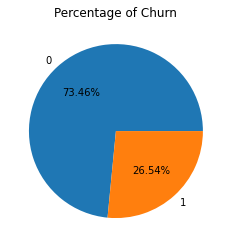

In [ ]:
plt.pie(original_data["Churn Value"].value_counts(), autopct = '%1.2f%%', labels=[0, 1])
plt.title('Percentage of Churn')
plt.show()

In [ ]:
def churn_plot(col): #This function will plot out the churn count for each feature
  numeric = ['Tenure Months',  
           'Monthly Charges', 
           'Total Charges', 
           'Age', 
           'Number of Dependents', 
           'Number of Referrals', 
           'Avg Monthly Long Distance Charges',
           'Avg Monthly GB Download',
           'Total Refunds',
           'Total Extra Data Charges',
           'Total Long Distance Charges',
           'Population'
           ]
  if col in numeric:
    sns.displot(data, x='Monthly Charges', hue = 'Churn Value', element='step')
  else:
    sns.countplot(x='Churn Value', hue=col, data=data)

In [ ]:
#churn_plot()

In [ ]:
def box_plot(col): #Box plot for numeric features
  numeric = ['Tenure Months',  
           'Monthly Charges', 
           'Total Charges', 
           'Age', 
           'Number of Dependents', 
           'Number of Referrals', 
           'Avg Monthly Long Distance Charges',
           'Avg Monthly GB Download',
           'Total Refunds',
           'Total Extra Data Charges',
           'Total Long Distance Charges',
           'Population'
           ]
  if col in numeric:
    original_data[col].plot.box()

In [ ]:
#box_plot()

# Processing data / Train-test Split / Feature Selection

In [ ]:
def outlier_plot():
  having_outliers = ['Number of Dependents', 
            'Number of Referrals',
            'Avg Monthly GB Download',
            'Total Refunds',
            'Total Extra Data Charges',
            'Total Long Distance Charges',
            'Population'
            ]
  for i in having_outliers:
    plt.hist(original_data[i], bins=20)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

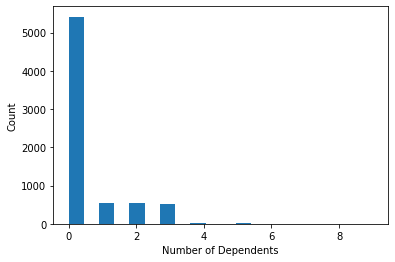

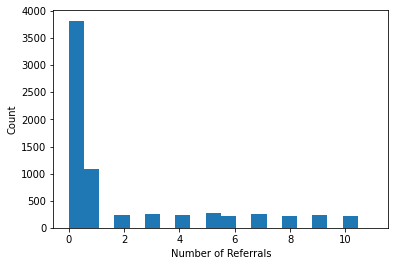

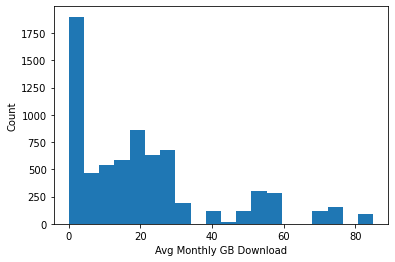

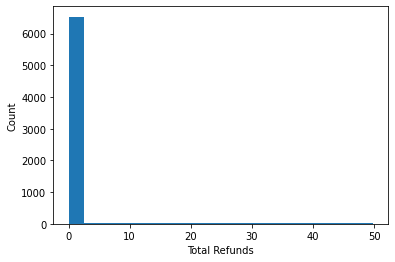

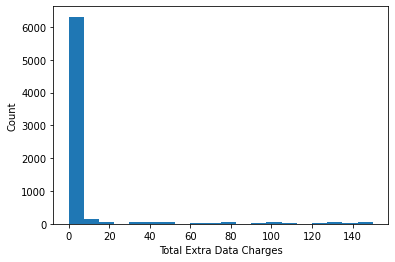

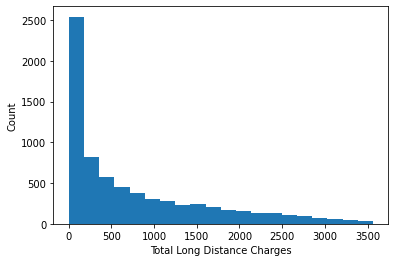

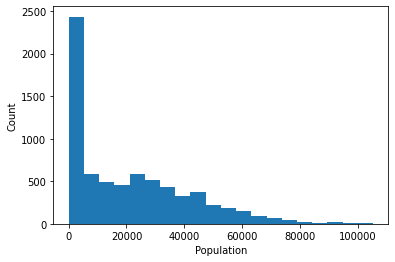

In [ ]:
outlier_plot()

In [ ]:
def data_processing(original_data):
  data = original_data.copy(deep=True)
  #Drop Sat. score because it completely decides whether the customer will be churn or not
  data.drop("Satisfaction Score",axis=1,inplace=True)
  #drop features with var = 0
  for col in data.columns:
    if data[col].unique().shape[0]==1:
      data.drop(col,axis=1,inplace=True)
  
  #Drop City because it has 1400s unique values and we can't really handle that
  data.drop("City",axis=1,inplace=True)
  #Churn Label is just Churn Value with Yes = 1, No = 0
  data.drop("Churn Label",axis=1,inplace=True)
  #Irrelevant to the model
  data.drop("Customer ID",axis=1,inplace=True)
  data.drop("CustomerID",axis=1,inplace=True)
  #Zip code,ID for zip code; again, irrelevant
  data.drop("ID",axis=1,inplace=True)
  data.drop("Zip Code",axis=1,inplace=True)
  #Redundant since there's both Latitude and Longtitude in the dataset
  data.drop("Lat Long",axis=1,inplace=True)
  #Customer Status just clarifies the status churned/not churned
  data.drop("Customer Status",axis=1,inplace=True)
  #Same as Tenure Months
  data.drop("Tenure in Months",axis=1,inplace=True)
  #Same as Married
  data.drop("Partner",axis=1,inplace=True)
  #Redundant since we have Number of Referrals
  data.drop("Referred a Friend",axis=1,inplace=True)
  #Same as Device Protection
  data.drop("Device Protection Plan",axis=1,inplace=True)
  #Same as Tech Support
  data.drop("Premium Tech Support",axis=1,inplace=True)
  #Same as Monthly Charges
  data.drop("Monthly Charge",axis=1,inplace=True)
  #Same as Total Charges
  data.drop("Total Revenue",axis=1,inplace=True)
  #Redundant since we have Number of Dependents
  data.drop("Dependents",axis=1,inplace=True)

  #The difference of internet service and type is just that if the type is dsl then the service is cable
  #Drop service because there's less info
  data.drop("Internet Service",axis=1,inplace=True)

  #This is another model output? we're not doing ensemble learning here
  data.drop("Churn Score",axis=1,inplace=True)
  #Services have 3 values : yes, no, no internet/no => merge with no
  service_cols = [
              "Online Security",
              "Online Backup",
              "Device Protection",
              "Tech Support",
              "Streaming TV",
              "Streaming Movies",
              "Payment Method",
              ]
  for col in service_cols:
    data[col]=data[col].replace("No", 0).replace("Yes", 1).replace("No internet service", 0)
  #Multiple Lines has 3 values, same procedure as Services
  data["Multiple Lines"]=data["Multiple Lines"].replace("No", 0).replace("Yes", 1).replace("No phone service", 0)
  #Yes/No Columns, Yes = 1 / No = 0
  binary_cols=["Senior Citizen",
              "Paperless Billing",
              "Under 30",
              "Married",
              "Streaming Music",
              "Unlimited Data",
              "Phone Service",
              "Multiple Lines",
              ]
  for col in binary_cols:
    data[col]=data[col].replace("No", 0).replace("Yes", 1)
  #No offense with this
  data["Gender"]=data["Gender"].replace("Female", 0).replace("Male", 1)

  #These we just decide to one-hot-encode
  dummy_cols=["Payment Method", #4 values
            "Offer",            #5 values
            "Internet Type",    #3 values
            ]
  data = pd.get_dummies(data, columns=dummy_cols)

  #Label encode contract to it's length
  data['Contract'] = data['Contract'].replace("Month-to-month", 1).replace("One year", 12).replace("Two year", 24)

  #Drop these rows with these reasons because it could be considered outliers
  #Also because it would be illogical for the model to learn based on these samples
  data.drop(data[data["Churn Reason"]=="Moved"].index,inplace=True)
  data.drop(data[data["Churn Reason"]=="Deceased"].index,inplace=True)
  #We actually thought of using these but due to the lack of time ...
  reason = data.pop("Churn Reason")
  category = data.pop("Churn Category")
  return data

In [ ]:
data = data_processing(original_data)

In [ ]:
def split_data(data_in):
  data = data_in.copy(deep=True)
  target = data.pop("Churn Value")
  from sklearn.model_selection import train_test_split
  #Split train, test to be 0.7:0.3
  #Stratified with class label ratio
  X_train, X_test, y_train, y_test = train_test_split (data,target,test_size=0.3, random_state=123)
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test= split_data(data)

In [ ]:
def plot_correlation(absolute=True):
  #absolute will plot out the absolute pearson coefficient of each feature to Churn
  churn_correlation_data = X_train.copy(deep=True)
  churn_correlation_data["Churn Value"]=y_train
  plt.figure(figsize=(15,10))
  if absolute:
    abs(churn_correlation_data.corr()['Churn Value']).sort_values(ascending = False).plot(kind='barh')
  else:
    churn_correlation_data.corr()['Churn Value'].sort_values(ascending = False).plot(kind='bar')
  

In [ ]:
def correlated_pair(dataset, threshold=0.7):
  correlated_col = list()
  # correlation matrix
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold: # add to correlated_col if correlation > threshold
        pair = [corr_matrix.columns[i], corr_matrix.columns[j]]
        correlated_col.append(pair)
  return correlated_col

In [ ]:
correlated_pair(X_train,0.7)

[['Longitude', 'Latitude'],
 ['Total Charges', 'Tenure Months'],
 ['Streaming Music', 'Streaming Movies'],
 ['Internet Type_Fiber Optic', 'Monthly Charges'],
 ['Internet Type_None', 'Monthly Charges'],
 ['Internet Type_None', 'Unlimited Data']]

In [ ]:
def mutual_info_plot(): 
  #This isn't deterministic and we actually forgot the random state of the plot in the report
  #Really sorry for this inconvinience
  from sklearn.feature_selection import mutual_info_classif
  # determine the mutual information
  mutual_info = mutual_info_classif(X_train, y_train)

  mutual_info = pd.Series(mutual_info)
  mutual_info.index = X_train.columns
  plt.figure(figsize=(15,10))
  mutual_info.sort_values(ascending=False).plot(kind='barh')

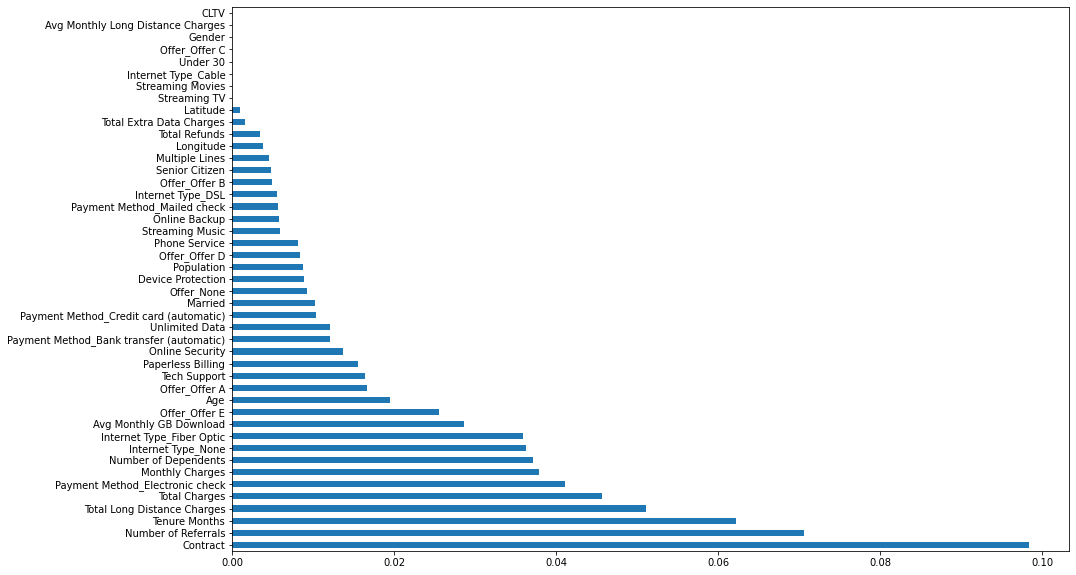

In [ ]:
mutual_info_plot()

In [ ]:
def feature_selection(X_train, X_test, y_train, y_test):
  def X_drop(col):
    X_train.drop(col,axis=1,inplace=True)
    X_test.drop(col,axis=1,inplace=True)

  X_drop("Total Refunds")
  X_drop("Streaming Music")
  X_drop("Streaming Movies")
  X_drop("Streaming TV")
  X_drop("Online Backup")
  X_drop("Device Protection")
  X_drop("Latitude")
  X_drop("Monthly Charges")
  X_drop("Total Charges")

  from sklearn.preprocessing import PowerTransformer
  power = PowerTransformer()

  X_train_transformed = power.fit_transform(X_train)
  X_test_transformed = power.fit_transform(X_test)

  from sklearn.preprocessing import MinMaxScaler
  scaler=MinMaxScaler()

  X_train_scaled = scaler.fit_transform(X_train_transformed)
  X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns,index= X_train.index)
  X_test_scaled = scaler.fit_transform(X_test_transformed)
  X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns,index= X_test.index)

  CLTV_train = X_train.pop("CLTV")
  CLTV_train = pd.DataFrame(CLTV_train,index= X_train.index)

  CLTV_test=X_test.pop("CLTV")
  CLTV_test = pd.DataFrame(CLTV_test,index= X_test.index)

  CLTV_train_scaled = X_train_scaled["CLTV"]

  CLTV_test_scaled = X_test_scaled["CLTV"]

  return (X_train_scaled,X_test_scaled,y_train,y_test,CLTV_train_scaled,CLTV_test_scaled,CLTV_test)

In [ ]:
(X_train_scaled,X_test_scaled,
 y_train,y_test,
 CLTV_train_scaled,CLTV_test_scaled,CLTV_test) = feature_selection(X_train, X_test,
                                                                   y_train, y_test)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 2432 to 3626
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Longitude                                 4888 non-null   float64
 1   Gender                                    4888 non-null   int64  
 2   Senior Citizen                            4888 non-null   int64  
 3   Tenure Months                             4888 non-null   float64
 4   Phone Service                             4888 non-null   int64  
 5   Multiple Lines                            4888 non-null   int64  
 6   Online Security                           4888 non-null   int64  
 7   Tech Support                              4888 non-null   int64  
 8   Contract                                  4888 non-null   int64  
 9   Paperless Billing                         4888 non-null   int64  
 10  Age                              

# Resampling

In [ ]:

def resample(X_train_scaled, y_train,CLTV_train_scaled,method):
  def smoteNC(X_train_scaled, y_train):
  
    from imblearn.over_sampling import SMOTENC
    columns_list = list(range(len(X_train_scaled.columns)))
    numerical_list = [0,3,10,15,16,18,19,20]
    categorical_list = [x for x in columns_list if x not in numerical_list]
    smt=SMOTENC(random_state = 123,n_jobs=-1,categorical_features=categorical_list)
    return smt.fit_resample(X_train_scaled,y_train)
  def randomOverSampler(X_train_scaled, y_train):
    from imblearn.over_sampling import RandomOverSampler
    ros = RandomOverSampler(random_state = 123)
    return ros.fit_resample(X_train_scaled,y_train)

  def randomUnderSampler(X_train_scaled, y_train):
    from imblearn.under_sampling import RandomUnderSampler
    rus = RandomUnderSampler(random_state = 123)
    return rus.fit_resample(X_train_scaled,y_train)

  def tomekLinks(X_train_scaled, y_train):
    from imblearn.under_sampling import TomekLinks
    tl = TomekLinks([0],n_jobs=-1)
    return tl.fit_resample(X_train_scaled,y_train)

  if method == "CLTV":
    X_resampled1, y_resampled1 = CLTVsmoteNC(X_train_scaled, y_train,CLTV_train_scaled)
    X_resampled1 = pd.DataFrame(X_resampled1, columns=X_train_scaled.columns.to_list()+["CLTV"])
    X_resampled2, y_resampled2 = tomekLinks(X_resampled1, y_resampled1)
    X_resampled2 = pd.DataFrame(X_resampled2, columns=X_train_scaled.columns.to_list()+["CLTV"])
    return X_resampled2, y_resampled2

  if method == "smote": 
    X_resampled, y_resampled = smoteNC(X_train_scaled, y_train)
    X_resampled = pd.DataFrame(X_resampled, columns=X_train_scaled.columns)
    return X_resampled, y_resampled

  if method == "over_random": 
    X_resampled, y_resampled = randomOverSampler(X_train_scaled, y_train)
    X_resampled = pd.DataFrame(X_resampled, columns=X_train_scaled.columns)
    return X_resampled, y_resampled

  if method == "under_random": 
    X_resampled, y_resampled = randomUnderSampler(X_train_scaled, y_train)
    X_resampled = pd.DataFrame(X_resampled, columns=X_train_scaled.columns)
    return X_resampled, y_resampled    

  if method == "tomek": 
    X_resampled, y_resampled = tomekLinks(X_train_scaled, y_train)
    X_resampled = pd.DataFrame(X_resampled, columns=X_train_scaled.columns)
    return X_resampled, y_resampled
  if method == "hybrid":
    X_resampled1, y_resampled1 = smoteNC(X_train_scaled, y_train)
    X_resampled1 = pd.DataFrame(X_resampled1, columns=X_train_scaled.columns)
    X_resampled2, y_resampled2 = tomekLinks(X_resampled1, y_resampled1)
    X_resampled2 = pd.DataFrame(X_resampled2, columns=X_train_scaled.columns)
    return X_resampled2, y_resampled2

The method parameter takes in:
*   "tomek"
*   "under_random"
*   "over_random"
*   "smote"
*   "hybrid"

For each sampling method respectively



In [ ]:

X_resampled, y_resampled= resample(X_train_scaled,
                                   y_train,
                                   CLTV_train_scaled=CLTV_train_scaled,
                                   method="hybrid"
                                  )
CLTV = X_resampled["CLTV"]


In [ ]:
from collections import Counter
Counter(y_resampled)

Counter({0.0: 3329, 1.0: 1258})

# Define Scorer / Model Result

In [ ]:
from sklearn.metrics import confusion_matrix
def get_fn_cltv(y_test,y_hat_test):
  fn = np.logical_and(y_test != y_hat_test, y_hat_test == 0)
  return float(CLTV_test[fn].sum())
def get_fp_cltv(y_test,y_hat_test):
  fp = np.logical_and(y_test != y_hat_test, y_hat_test == 1)
  return float(CLTV_test[fp].sum())
confusion_matrix
def show_model_gs(gs_instance, X_test_scaled, y_test):
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import precision_recall_fscore_support
  from sklearn.metrics import classification_report
  y_hat_test = gs_instance.predict(X_test_scaled)
  cm=confusion_matrix(y_test,y_hat_test)
  conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
  plt.figure(figsize = (6,4))
  sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
  print("Best Cross-Validation Score: %f using %s" % (gs_instance.best_score_, gs_instance.best_params_))
  print(classification_report(y_hat_test, y_test))

def show_model_gs_cltv(gs_instance, X_test_scaled, y_test):
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import precision_recall_fscore_support
  from sklearn.metrics import classification_report
  y_hat_test = gs_instance.predict(X_test_scaled)
  cm=confusion_matrix(y_test,y_hat_test)
  conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
  plt.figure(figsize = (6,4))
  sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
  print("Best: %f using %s" % (gs_instance.best_score_, gs_instance.best_params_))
  print(classification_report(y_hat_test, y_test))
  fn = get_fn_cltv(y_test,y_hat_test)
  fp = get_fp_cltv(y_test,y_hat_test)
  s1 = fn+fp
  s2 = 5*fn +fp
  print("CLTV FP: %f | FN: %f " %(fp,fn))
  print("Sum: %f1 |Weighted Sum: %f " %(s1,s2))
  
def show_model_rfe(rfe_instance, X_test_scaled, y_test):
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import precision_recall_fscore_support
  from sklearn.metrics import classification_report
  selector_prediction= rfe_instance.predict(X_test_scaled)
  cm=confusion_matrix(y_test,rfe_instance.predict(X_test_scaled))
  conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
  plt.figure(figsize = (6,4))
  sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
  print("Feature eliminated : "+ str(np.count_nonzero(rfe_result.ranking_-1)))
  print(classification_report(selector_prediction, y_test))


In [ ]:
#Scoring func.
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.utils.class_weight import compute_sample_weight
#Make scoring function of F-Beta with Beta = 5
def f_beta_5(y_true, y_pred, **kwargs):
  return fbeta_score(y_true,y_pred,
                     beta=5)
f_beta_5_scorer = make_scorer(f_beta_5)
#Make scoring function of F-Beta with Beta = 5 and sample weight according to CLTV feature
def cltv_weighted_f_beta_5(y_true, y_pred, **kwargs):
    cltv_weight=CLTV.loc[y_true.index.values].values.reshape(-1)
    return fbeta_score(y_true,y_pred,beta=5, sample_weight=cltv_weight)
cltv_weighted_f_beta_5_scorer = make_scorer(cltv_weighted_f_beta_5)

# Logistic Regression Model

In [ ]:
def lr(X_train_scaled, y_train,class_weighted=False,score_weight = False ,cltv_weighted=False,default=True):
  from sklearn.model_selection import RepeatedStratifiedKFold
  from sklearn.model_selection import GridSearchCV
  from sklearn.linear_model import LogisticRegression
  from sklearn.model_selection import ParameterGrid
  #grid search
  if class_weighted:
    model_gs = LogisticRegression(max_iter=600,
                                  class_weight='balanced',
                                  )
  else:     
    model_gs = LogisticRegression(max_iter=600,
                                  # class_weight='balanced',
                                  )
  
  # define grid search
  solvers = ['newton-cg', 'lbfgs', 'liblinear']
  penalty = ['l2']
  c_values = [10000,1000,100, 10, 1.0, 0.1, 0.01]
  grid = dict(solver=solvers,penalty=penalty,C=c_values)
  
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
  if cltv_weighted:
    grid_search = GridSearchCV(estimator=model_gs,
                              param_grid=(grid),
                              n_jobs=-1,
                              cv=cv,
                              scoring=cltv_weighted_f_beta_5_scorer,
                              error_score='raise',
                              verbose=2,)
    grid_result = grid_search.fit(X_train_scaled, y_train,
                                sample_weight = CLTV
                                )
    return grid_result
  if score_weight:
    grid_search = GridSearchCV(estimator=model_gs,
                          param_grid=(grid),
                          n_jobs=-1,
                          cv=cv,
                          scoring=f_beta_5_scorer,
                          error_score='raise',
                          verbose=2,)
  if default:
        grid_search = GridSearchCV(estimator=model_gs,
                          param_grid=(grid),
                          n_jobs=-1,
                          cv=cv,
                          scoring="f1",
                          error_score='raise',
                          verbose=2,)
  grid_result = grid_search.fit(X_train_scaled, y_train,
                                # sample_weight = CLTV_train_scaled
                                )
  return grid_result

In the lr function, there're some boolean parameter:
*   class_weighted: set class_weight parameter = 'balanced'
*   score_weight: set scorer to f-5
*   cltv_weighted: set gridsearch to evaluate CLTV models
*   default: set scorer to f-1





In [ ]:
grid_lr_result=lr(X_resampled,
                  y_resampled,
                  # class_weighted=True,
                  score_weight = True,
                  # cltv_weighted =True,
                  default=False
                  )

Fitting 30 folds for each of 21 candidates, totalling 630 fits


Best: 0.884800 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85      1385
         1.0       0.75      0.58      0.66       711

    accuracy                           0.79      2096
   macro avg       0.78      0.74      0.75      2096
weighted avg       0.79      0.79      0.79      2096

CLTV FP: 1220919.000000 | FN: 593150.000000 
Sum: 1814069.0000001 |Weighted Sum: 4186669.000000 


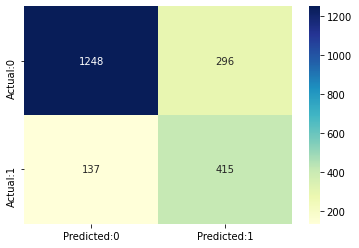

In [ ]:
show_model_gs_cltv(grid_lr_result, X_test_scaled, y_test)

In [ ]:
def plot_coeff(gs_instance):
  weights = pd.Series(gs_instance.best_estimator_.coef_[0],
                  index=X_train_scaled.columns)

  plt.figure(figsize=(30, 10))
  plt.subplot(1, 2, 1)
  # show features negatively affecting churn - based on LR coefficients
  weights.sort_values(ascending = False).plot(kind='barh')

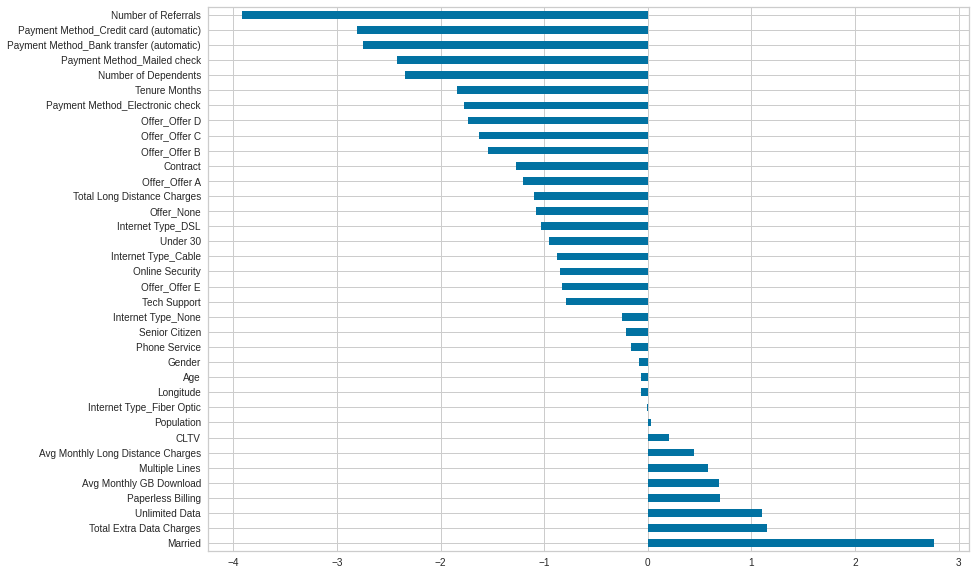

In [ ]:
plot_coeff(grid_lr_result)

# SVM Model

In [ ]:
def svm(X_train_scaled, y_train,class_weighted=False,score_weight = False,cltv_weighted=False,default=True):
  from sklearn.svm import SVC
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import RepeatedStratifiedKFold
  from sklearn.model_selection import ParameterGrid
  # defining parameter range 
  kernels = ['rbf', 'sigmoid']
  gamma = [100,10,1, 0.01, 0.0001]
  c_values = [1000,100,10]
  if class_weighted:
    model_gs = SVC(
                  class_weight='balanced',
                  )
  else:     
    model_gs = SVC(
                  # class_weight='balanced',
                  )
  grid = dict(kernel=kernels,gamma=gamma,C=c_values)

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
  if cltv_weighted:
    grid_search = GridSearchCV(estimator=model_gs,
                              param_grid=(grid),
                              n_jobs=-1,
                              cv=cv,
                              scoring=cltv_weighted_f_beta_5_scorer,
                              error_score='raise',
                              verbose=2,)
    grid_result = grid_search.fit(X_train_scaled, y_train,
                                sample_weight = CLTV
                                )
    return grid_result
  if score_weight:
    grid_search = GridSearchCV(estimator=model_gs,
                          param_grid=(grid),
                          n_jobs=-1,
                          cv=cv,
                          scoring=f_beta_5_scorer,
                          error_score='raise',
                          verbose=2,)
  if default:
        grid_search = GridSearchCV(estimator=model_gs,
                          param_grid=(grid),
                          n_jobs=-1,
                          cv=cv,
                          scoring="f1",
                          error_score='raise',
                          verbose=2,)
  grid_result = grid_search.fit(X_train_scaled, y_train,
                                # sample_weight = CLTV_train_scaled
                                )
  return grid_result




In the svm function, there're some boolean parameter:
*   class_weighted: set class_weight parameter = 'balanced'
*   score_weight: set scorer to f-5
*   cltv_weighted: set gridsearch to evaluate CLTV models
*   default: set scorer to f-1



In [ ]:
grid_svm_result=svm(X_resampled,
                    y_resampled,
                    # class_weighted = True,
                    score_weight = True,
                    # cltv_weighted = True,
                    default= False
                    ) 

Fitting 30 folds for each of 30 candidates, totalling 900 fits


Best Cross-Validation Score: 0.836333 using {'C': 100, 'gamma': 0.0001, 'kernel': 'sigmoid'}
              precision    recall  f1-score   support

         0.0       0.70      0.93      0.80      1168
         1.0       0.84      0.50      0.63       928

    accuracy                           0.74      2096
   macro avg       0.77      0.71      0.71      2096
weighted avg       0.76      0.74      0.72      2096



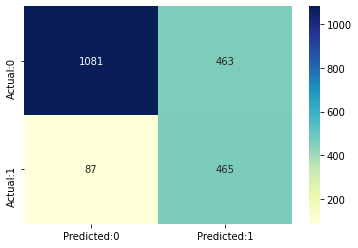

In [ ]:
show_model_gs(grid_svm_result, X_test_scaled, y_test)

# Threshold Tuning

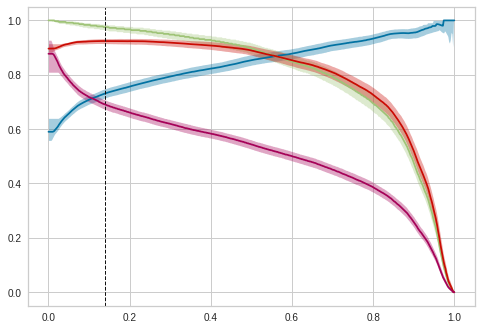

In [ ]:

from yellowbrick.classifier import DiscriminationThreshold
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
visualizer = DiscriminationThreshold(grid_lr_result.best_estimator_,
                                    #quantiles=np.array([0.25, 0.5, 0.75]),
                                    cv=cv,
                                    random_state = 123,
                                    fbeta=5**0.5
                                    )
try:
  visualizer.fit(X_resampled, y_resampled)
except:
  print("I don't know why this happens, probably because we don't use pipeline")

best_threshold=visualizer.thresholds_[visualizer.cv_scores_[visualizer.argmax].argmax()]

In [ ]:
def threshold_show(gs_instance, best_threshold,X,y):
  from sklearn.metrics import classification_report
  y_hat_test_after_threshold=(gs_instance.best_estimator_.predict_proba(X)[:,1]>best_threshold).astype(int)
  cm=confusion_matrix(y,y_hat_test_after_threshold)
  conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
  plt.figure(figsize = (8,5))
  sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
  print("Best Threshold: %f" %best_threshold)
  print(classification_report(y_hat_test_after_threshold, y))

def cltv_threshold_show(gs_instance, best_threshold,X_test_scaled,y_test):
  from sklearn.metrics import classification_report
  y_hat_test=(gs_instance.best_estimator_.predict_proba(X_test_scaled)[:,1]>best_threshold).astype(int)
  cm=confusion_matrix(y_test,y_hat_test)
  conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
  plt.figure(figsize = (8,5))
  sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
  print("Best Threshold: %f" %best_threshold)
  print(classification_report(y_hat_test, y_test))
  fn = get_fn_cltv(y_test,y_hat_test)
  fp = get_fp_cltv(y_test,y_hat_test)
  s1 = fn+fp
  s2 = 5*fn +fp
  print("CLTV FP: %f | FN: %f " %(fp,fn))
  print("Sum: %f1 |Weighted Sum: %f " %(s1,s2))

Best Threshold: 0.140000
              precision    recall  f1-score   support

           0       0.57      0.96      0.72       919
           1       0.93      0.44      0.60      1177

    accuracy                           0.67      2096
   macro avg       0.75      0.70      0.66      2096
weighted avg       0.77      0.67      0.65      2096

CLTV FP: 2822110.000000 | FN: 179350.000000 
Sum: 3001460.0000001 |Weighted Sum: 3718860.000000 


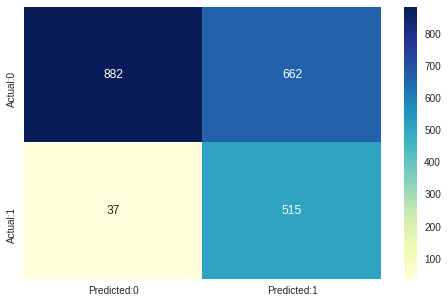

In [ ]:
cltv_threshold_show(grid_lr_result,best_threshold,X_test_scaled,y_test)

# Unfinished

In [ ]:
#unfinished
def rfe(gs_instance,X_train_scaled, y_train,cltv_weighted=False,default=True):
  from sklearn.feature_selection import RFECV
  from sklearn.model_selection import RepeatedStratifiedKFold
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
  estimator = gs_instance.best_estimator_
  if cltv_weighted:
    selector = RFECV(estimator, step=1, cv=cv,scoring=cltv_weighted_f_beta_scorer,n_jobs=-1)
  else:
    selector = RFECV(estimator, step=1, cv=cv,scoring=weighted_f_beta_scorer,n_jobs=-1)
  if default:
    selector = RFECV(estimator, step=1, cv=cv,scoring=f1_scorer,n_jobs=-1)
  selector_result = selector.fit(X_train_scaled, y_train)
  return selector_result
rfe_result = rfe(grid_lr_result,X_resampled1, y_resampled1,default=False)

show_model_rfe (rfe_result, X_test_scaled, y_test)

Counter({0.0: 3630, 1.0: 3630})